In [1]:
from glob import glob
import boto3
import numpy as np
import scipy.stats as sps
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
ids = list(set([foo.split('/')[-1].split('-')[0] for 
                foo in glob('/Users/arokem/data/mri2mri/t1_pdd_cosine_L1_unet128_T3_3d/*')]))

In [3]:
subject = ids[0]

In [4]:
client = boto3.resource('s3')
bucket_name = 'arokem.mri2mri.dwi-predictions'
b = client.Bucket(bucket_name)

Subject volumes does not have errors calculated
MannwhitneyuResult(statistic=1071.0, pvalue=3.947244281894217e-12)


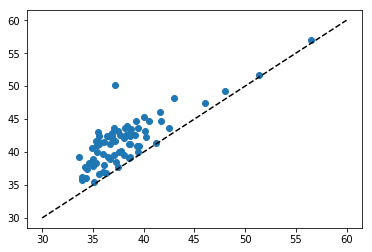

In [5]:
experiment = "t1_pdd_cosine_L1_unet128_T3_3d"
results = {}
for sigma in["0"]:#, "0.1", "1.0", "2.0", "5.0", "10.0"]:
    fig, ax = plt.subplots(1)
    results[sigma] = {}
    results[sigma]["mean_err_nn"] = []
    results[sigma]["mean_err_template"] = []
    for subject in ids:
        try:
            b.download_file('%s/test_latest/gaussian_%s/errors/%s_error_nn.nii.gz'%(experiment, sigma, subject), 'error_nn.nii.gz')
            b.download_file('%s/test_latest/gaussian_%s/errors/%s_error_template.nii.gz'%(experiment, sigma, subject), 'error_template.nii.gz')
            error_nn = nib.load('error_nn.nii.gz').get_data()
            error_template = nib.load('error_template.nii.gz').get_data()
            results[sigma]["mean_err_nn"].append(np.nanmean(error_nn))
            results[sigma]["mean_err_template"].append(np.nanmean(error_template))
        except:
            print("Subject %s does not have errors calculated"%subject)
    
    ax.scatter(results[sigma]["mean_err_nn"], results[sigma]["mean_err_template"])
    ax.plot([30, 60], [30, 60], 'k--')
    print(sps.mannwhitneyu(results[sigma]["mean_err_nn"], results[sigma]["mean_err_template"]))

In [6]:
import matplotlib

In [7]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

MannwhitneyuResult(statistic=1071.0, pvalue=3.947244281894217e-12)


/Users/arokem/.virtualenvs/mri2mri_py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


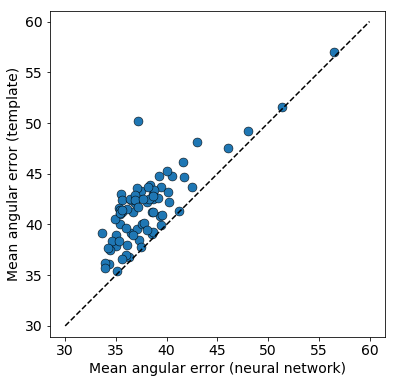

In [8]:
fig, ax = plt.subplots(1)
ax.scatter(results["0"]["mean_err_nn"], results["0"]["mean_err_template"], s=80, linewidth=0.5, edgecolors='k')
ax.plot([30, 60], [30, 60], 'k--')
ax.axis("equal")
ax.set_xlabel("Mean angular error (neural network)")
ax.set_ylabel("Mean angular error (template)")
fig.set_size_inches([6,6])
print(sps.mannwhitneyu(results["0"]["mean_err_nn"], results["0"]["mean_err_template"]))



In [12]:
np.array(results["0"]["mean_err_nn"]) > np.array(results["0"]["mean_err_template"])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])